In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('loandata.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12140\1840820301.py:1: DtypeWarning: Columns (19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loandata.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# Data Cleaning and Handeling missing values

In [5]:
# droping null value columns
null=df.isnull().mean()
df.drop(columns=null[null.values>=0.5].index,axis=1,inplace=True)
df.shape

(421094, 54)

In [6]:
# Checking for missing Values
remain =df.isnull().mean()
remain=remain[remain.values!=0]
remain

emp_title                 0.056695
emp_length                0.056560
title                     0.000313
mths_since_last_delinq    0.484360
revol_util                0.000385
last_pymnt_d              0.041043
next_pymnt_d              0.061167
last_credit_pull_d        0.000026
dtype: float64

In [7]:
len(df['emp_title'].unique())

120812

In [8]:
# two many categoery therfore droping
df.drop('emp_title',axis=1,inplace=True)

In [9]:
# same as purpose
df.drop('title',axis=1,inplace=True)

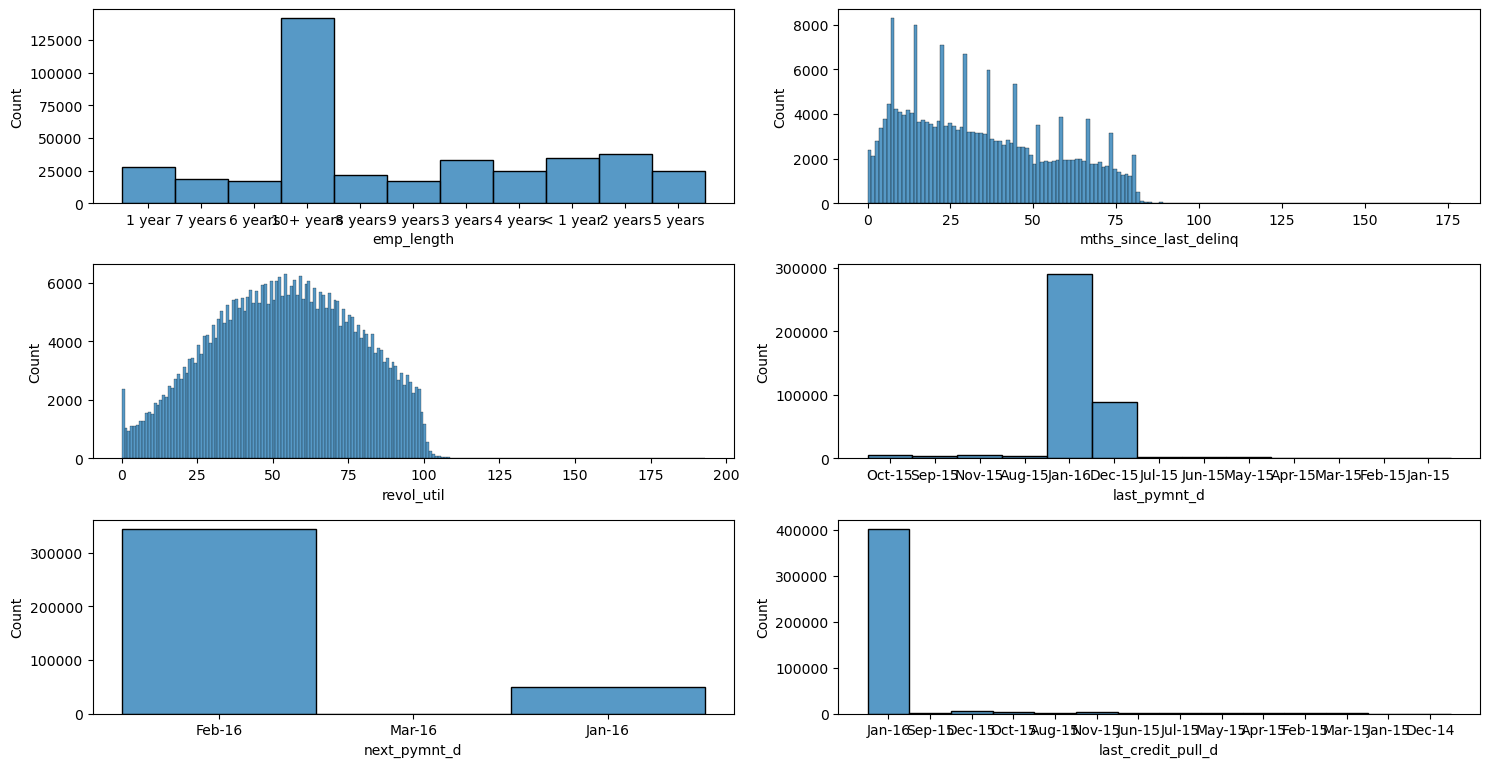

In [10]:
num_cols = ['emp_length','mths_since_last_delinq','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
plt.figure(figsize=(15, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 2, i + 1)
    sns.histplot(data=df, x=num_cols[i])

plt.tight_layout()

In [11]:
df['emp_length']=df['emp_length'].fillna(value=df['emp_length'].mode()[0])
df['mths_since_last_delinq']=df['mths_since_last_delinq'].fillna(value=df['mths_since_last_delinq'].median())
df['revol_util']=df['revol_util'].fillna(value=df['revol_util'].median())
df['last_pymnt_d']=df['last_pymnt_d'].fillna(value=df['last_pymnt_d'].mode()[0])
df['next_pymnt_d']=df['next_pymnt_d'].fillna(value=df['next_pymnt_d'].mode()[0])
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(value=df['last_credit_pull_d'].mode()[0])

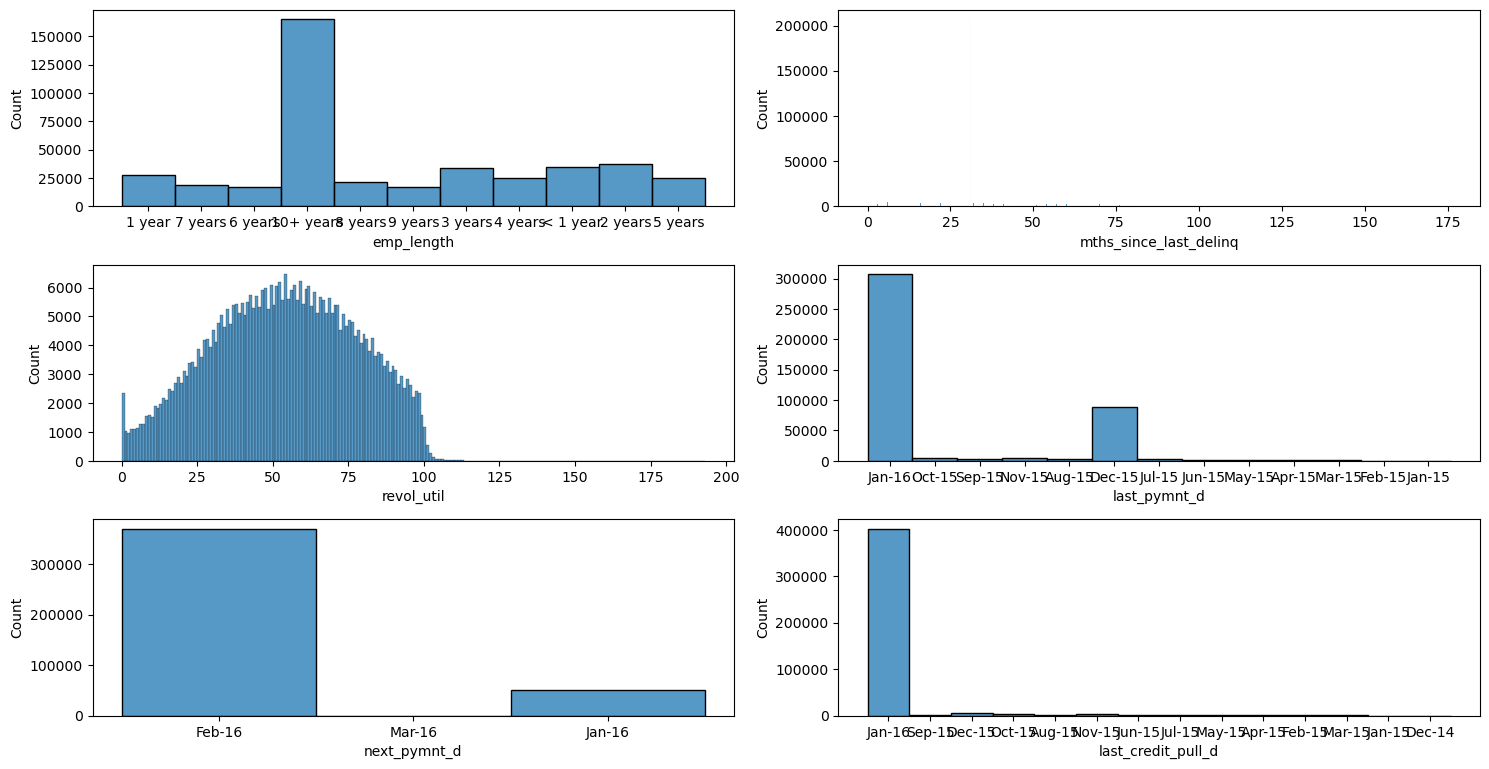

In [12]:
num_cols = ['emp_length','mths_since_last_delinq','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
plt.figure(figsize=(15, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 2, i + 1)
    sns.histplot(data=df, x=num_cols[i])

plt.tight_layout()

# Creating Target variable

In [14]:
df['loan_status'].value_counts()

loan_status
Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: count, dtype: int64

In [15]:
df['loan_status']=df['loan_status'].replace({'Current': 1,'In Grace Period': 1, 'Issued': 1, 'Late (16-30 days)': 1, 'Fully Paid': 1,'Default': 0 , 'Late (31-120 days)': 0, 'Charged Off': 0})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12140\3845685886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status']=df['loan_status'].replace({'Current': 1,'In Grace Period': 1, 'Issued': 1, 'Late (16-30 days)': 1, 'Fully Paid': 1,'Default': 0 , 'Late (31-120 days)': 0, 'Charged Off': 0})


In [16]:
df['loan_status'].value_counts()

loan_status
1    413243
0      7851
Name: count, dtype: int64

In [17]:
(7851/413243)*100

1.899850693175686

# Dealing with date

In [19]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [20]:
def calculate_month_diff(df, column):
    today_date = pd.to_datetime('2023-04-01')
    df[column] = pd.to_datetime(df[column], format="%b-%y")

    # Calculate the difference in years and months
    diff_in_years = today_date.year - df[column].dt.year
    diff_in_months = today_date.month - df[column].dt.month

    # Combine years and months to get the total difference in months
    df[column+'_months'] = diff_in_years * 12 + diff_in_months
    df.drop(column,axis=1,inplace=True)

In [21]:
calculate_month_diff(df, 'issue_d')
calculate_month_diff(df, 'earliest_cr_line')
calculate_month_diff(df, 'last_pymnt_d')
calculate_month_diff(df, 'next_pymnt_d')
calculate_month_diff(df, 'last_credit_pull_d')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          421094 non-null  int64  
 1   member_id                   421094 non-null  int64  
 2   loan_amnt                   421094 non-null  int64  
 3   funded_amnt                 421094 non-null  int64  
 4   funded_amnt_inv             421094 non-null  int64  
 5   term                        421094 non-null  object 
 6   int_rate                    421094 non-null  float64
 7   installment                 421094 non-null  float64
 8   grade                       421094 non-null  object 
 9   sub_grade                   421094 non-null  object 
 10  emp_length                  421094 non-null  object 
 11  home_ownership              421094 non-null  object 
 12  annual_inc                  421094 non-null  float64
 13  verification_s

# Feature Selection

In [24]:
df.drop(columns = ['id', 'member_id', 'url','zip_code','addr_state','sub_grade'], inplace = True)

In [83]:
Y =df['loan_status']
object =df.select_dtypes(include = 'object')
num =df.select_dtypes(include = 'number').drop('loan_status',axis=1)

In [26]:
# Selecting catagoerical Feature

In [27]:
object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 421094 non-null  object
 1   grade                421094 non-null  object
 2   emp_length           421094 non-null  object
 3   home_ownership       421094 non-null  object
 4   verification_status  421094 non-null  object
 5   pymnt_plan           421094 non-null  object
 6   purpose              421094 non-null  object
 7   initial_list_status  421094 non-null  object
 8   application_type     421094 non-null  object
dtypes: object(9)
memory usage: 28.9+ MB


In [28]:
from scipy.stats import chi2_contingency

def chi_square_significant_columns(df, columns_list, y, alpha=0.05):
    significant_columns = []
    for col in columns_list:
        # Create a contingency table with the feature and the target column
        contingency_table = pd.crosstab(df[col], y)
        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Check if p-value is less than the threshold alpha
        if p < alpha:
            significant_columns.append(col)

    return significant_columns


In [85]:
obj_columns=chi_square_significant_columns(object,object.columns, Y)

In [30]:
#selecting Numerical feature

In [31]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   421094 non-null  int64  
 1   funded_amnt                 421094 non-null  int64  
 2   funded_amnt_inv             421094 non-null  int64  
 3   int_rate                    421094 non-null  float64
 4   installment                 421094 non-null  float64
 5   annual_inc                  421094 non-null  float64
 6   dti                         421094 non-null  float64
 7   delinq_2yrs                 421094 non-null  int64  
 8   inq_last_6mths              421094 non-null  int64  
 9   mths_since_last_delinq      421094 non-null  float64
 10  open_acc                    421094 non-null  int64  
 11  pub_rec                     421094 non-null  int64  
 12  revol_bal                   421094 non-null  int64  
 13  revol_util    

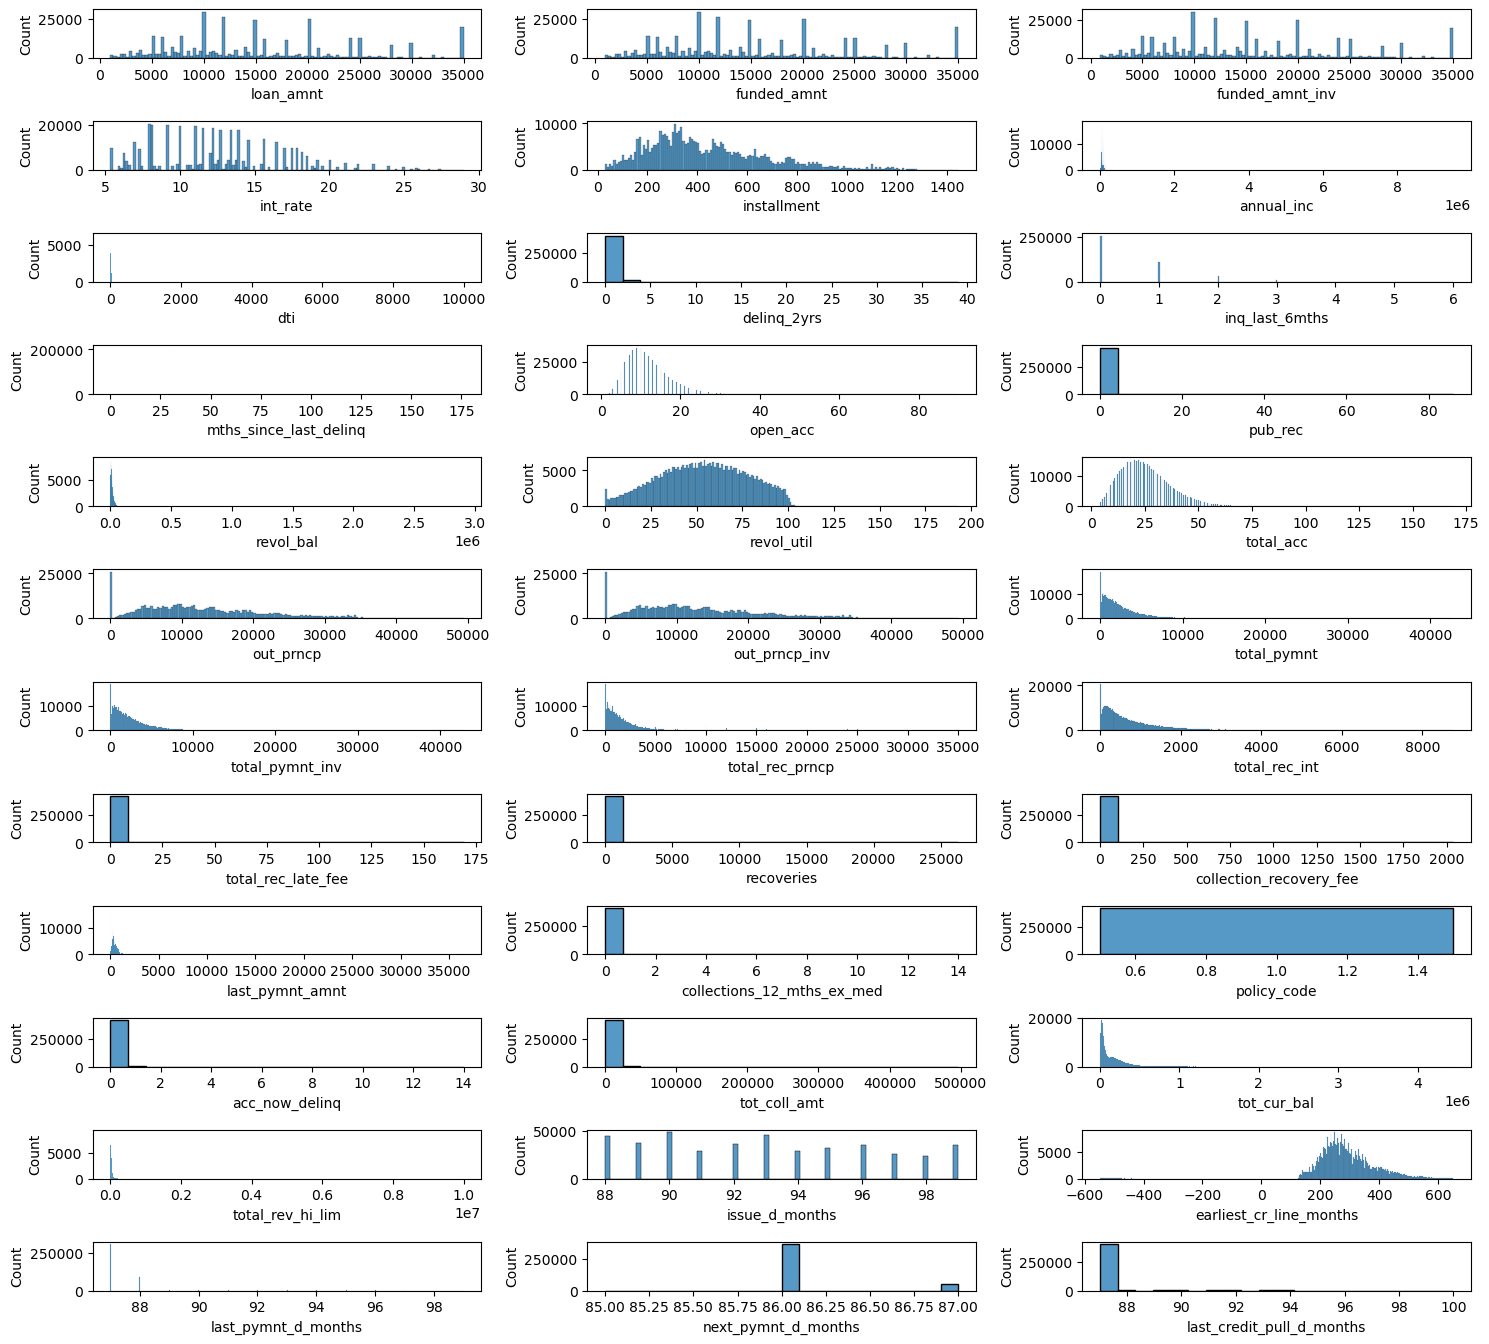

In [32]:
num_cols = num.columns
plt.figure(figsize=(15, 40))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 3, i + 1)
    sns.histplot(data=num, x=num_cols[i])

plt.tight_layout()

In [33]:
# droping , 'funded_amnt', 'funded_amnt_inv'=='loan_amnt'
# 'funded_amnt', 'funded_amnt_inv',delinq_2yrs, inq_last_6mths, pub_rec, out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection_recovery_fee, policy_code, collections_12_mths_ex_med, acc_now_delinq, and tot_coll_amt==0

In [34]:
num.drop([
    'funded_amnt', 'funded_amnt_inv', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 
    'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'policy_code', 'collections_12_mths_ex_med', 
    'acc_now_delinq', 'tot_coll_amt'
],axis=1,inplace=True)

In [35]:
# Some outliers from the columns open_acc, revol_balance, total_acc, total_rec_int, tot_cur_balance, and total_rev_hi_lim could be removed.

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drop_high_vif_columns(df, threshold=5.0):
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        
        # Find the feature with the maximum VIF
        max_vif = vif_data["VIF"].max()
        
        if max_vif >= threshold:
            max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            df.drop(columns=[max_vif_feature], inplace=True)
        else:
            break  # Stop if no VIF is above the threshold

    return df

In [37]:
#num= drop_high_vif_columns(num, threshold=5.0)

In [38]:
from scipy.stats import ttest_ind

def t_test_significant_columns(df, columns_list, y, alpha=0.05):
    significant_columns = []
    values={}
    for col in columns_list:
        # Separate the feature values based on the target variable
        group_0 = df[y == 0][col]
        group_1 = df[y == 1][col]

        # Perform the t-test
        t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Assuming unequal variance
        values[col]=p_value.round(5)

        # Check if p-value is less than the threshold alpha
        if p_value < alpha:
            significant_columns.append(col)

    return significant_columns,values


In [87]:
num_columns,values =t_test_significant_columns(num,num.columns,Y)

C:\Users\lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [137]:
final=df[obj_columns+num_columns]

In [139]:
final.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim', 'issue_d_months',
       'earliest_cr_line_months', 'last_pymnt_d_months', 'next_pymnt_d_months',
       'last_credit_pull_d_months'],
      dtype='object')

In [141]:
final.shape

(421094, 38)

In [143]:
import pandas as pd
import numpy as np

def apply_binning_woe_iv(df, num_cols, cat_cols, y):
    """
    Apply binning on numerical columns and calculate WoE and IV for both numerical and categorical columns.
    
    Args:
    df (pd.DataFrame): Input DataFrame containing numerical and categorical columns.
    num_cols (list): List of numerical column names.
    cat_cols (list): List of categorical column names.
    y (pd.Series): Target variable containing binary outcome (1 = good, 0 = bad).
    
    Returns:
    pd.DataFrame: DataFrame containing column name, WoE, and IV for each bin or category.
    """
    result = []

    # Function to calculate WoE and IV
    def calculate_woe_iv(crosstab):
        crosstab['% Good'] = crosstab[1] / crosstab[1].sum()
        crosstab['% Bad'] = crosstab[0] / crosstab[0].sum()
        crosstab['WoE'] = np.log(crosstab['% Good'] / crosstab['% Bad'])
        crosstab['IV'] = (crosstab['% Good'] - crosstab['% Bad']) * crosstab['WoE']
        iv_sum = crosstab['IV'].sum()
        return crosstab, iv_sum

    # For numerical columns, apply binning (bin size 10)
    for col in num_cols:
        df.loc[:, col + '_bin'] = pd.qcut(df[col], 10, duplicates='drop')  # Binning into 10 equal-sized buckets
        cross_tab = pd.crosstab(df[col + '_bin'], y)
        cross_tab, iv_sum = calculate_woe_iv(cross_tab)
        
        for idx in cross_tab.index:
            result.append({
                'Column': col,
                'Bin/Category': idx,
                'WoE': cross_tab.loc[idx, 'WoE'],
                'IV': iv_sum
            })

    # For categorical columns, directly calculate WoE and IV
    for col in cat_cols:
        cross_tab = pd.crosstab(df[col], y)
        cross_tab, iv_sum = calculate_woe_iv(cross_tab)
        
        for idx in cross_tab.index:
            result.append({
                'Column': col,
                'Bin/Category': idx,
                'WoE': cross_tab.loc[idx, 'WoE'],
                'IV': iv_sum
            })

    # Convert the results to a DataFrame and return
    result_df = pd.DataFrame(result)
    
    return result_df



In [146]:
import pandas as pd
import numpy as np

def apply_binning_woe_iv(df, num_cols, cat_cols, y):
    """
    Apply binning on numerical columns and calculate WoE and IV for both numerical and categorical columns.
    
    Args:
    df (pd.DataFrame): Input DataFrame containing numerical and categorical columns.
    num_cols (list): List of numerical column names.
    cat_cols (list): List of categorical column names.
    y (pd.Series): Target variable containing binary outcome (1 = good, 0 = bad).
    
    Returns:
    pd.DataFrame: DataFrame containing column name, WoE, and IV for each bin or category.
    """
    result = []

    # Function to calculate WoE and IV
    def calculate_woe_iv(crosstab):
        crosstab['% Good'] = crosstab[1] / crosstab[1].sum()
        crosstab['% Bad'] = crosstab[0] / crosstab[0].sum()
        crosstab['WoE'] = np.log(crosstab['% Good'] / crosstab['% Bad'])
        crosstab['IV'] = (crosstab['% Good'] - crosstab['% Bad']) * crosstab['WoE']
        iv_sum = crosstab['IV'].sum()
        return crosstab, iv_sum

    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df_copy = df.copy()

    # For numerical columns, apply binning (bin size 10)
    for col in num_cols:
        # Apply binning into 10 equal-sized buckets
        df_copy[col + '_bin'] = pd.qcut(df_copy[col], 10, duplicates='drop')
        cross_tab = pd.crosstab(df_copy[col + '_bin'], y)
        cross_tab, iv_sum = calculate_woe_iv(cross_tab)
        
        for idx in cross_tab.index:
            result.append({
                'Column': col,
                'Bin/Category': idx,
                'WoE': cross_tab.loc[idx, 'WoE'],
                'IV': iv_sum
            })

    # For categorical columns, directly calculate WoE and IV
    for col in cat_cols:
        cross_tab = pd.crosstab(df_copy[col], y)
        cross_tab, iv_sum = calculate_woe_iv(cross_tab)
        
        for idx in cross_tab.index:
            result.append({
                'Column': col,
                'Bin/Category': idx,
                'WoE': cross_tab.loc[idx, 'WoE'],
                'IV': iv_sum
            })

    # Convert the results to a DataFrame and return
    result_df = pd.DataFrame(result)
    
    return result_df




In [147]:
# Example usage
# df = pd.DataFrame(...)  # Replace with actual data
# num_cols = ['column1', 'column2']  # List of numerical columns
# cat_cols = ['column3', 'column4']  # List of categorical columns
# y = df['target_column']  # Target variable

woe_iv_df = apply_binning_woe_iv(final,num_columns,obj_columns, Y)


In [100]:
vi=woe_iv_df.groupby('Column')

In [149]:
vi['IV'].sum().sort_values(ascending=False)

Column
home_ownership                     inf
purpose                            inf
issue_d_months                8.953938
last_pymnt_d_months           7.794116
int_rate                      6.765217
out_prncp_inv                 5.038587
out_prncp                     5.034593
grade                         4.437590
total_rec_prncp               1.933690
total_pymnt                   0.862256
total_pymnt_inv               0.861380
total_rec_int                 0.565021
total_rev_hi_lim              0.543575
dti                           0.492183
annual_inc                    0.337234
earliest_cr_line_months       0.335051
tot_cur_bal                   0.333868
initial_list_status           0.252593
revol_util                    0.197002
revol_bal                     0.195327
last_pymnt_amnt               0.169041
verification_status           0.140424
inq_last_6mths                0.135375
emp_length                    0.130330
installment                   0.110767
next_pymnt_d_month

In [152]:
IV =vi['IV'].sum().sort_values(ascending=False)

In [154]:
IV_columns=IV[IV.values>=0.5].index
IV_columns

Index(['home_ownership', 'purpose', 'issue_d_months', 'last_pymnt_d_months',
       'int_rate', 'out_prncp_inv', 'out_prncp', 'grade', 'total_rec_prncp',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rev_hi_lim'],
      dtype='object', name='Column')

In [192]:
final=final[IV_columns]
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   home_ownership       421094 non-null  object 
 1   purpose              421094 non-null  object 
 2   issue_d_months       421094 non-null  int32  
 3   last_pymnt_d_months  421094 non-null  int32  
 4   int_rate             421094 non-null  float64
 5   out_prncp_inv        421094 non-null  float64
 6   out_prncp            421094 non-null  float64
 7   grade                421094 non-null  object 
 8   total_rec_prncp      421094 non-null  float64
 9   total_pymnt          421094 non-null  float64
 10  total_pymnt_inv      421094 non-null  float64
 11  total_rec_int        421094 non-null  float64
 12  total_rev_hi_lim     421094 non-null  int64  
dtypes: float64(7), int32(2), int64(1), object(3)
memory usage: 38.6+ MB


In [194]:
final.drop(columns=['out_prncp_inv','total_pymnt_inv',],inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   home_ownership       421094 non-null  object 
 1   purpose              421094 non-null  object 
 2   issue_d_months       421094 non-null  int32  
 3   last_pymnt_d_months  421094 non-null  int32  
 4   int_rate             421094 non-null  float64
 5   out_prncp            421094 non-null  float64
 6   grade                421094 non-null  object 
 7   total_rec_prncp      421094 non-null  float64
 8   total_pymnt          421094 non-null  float64
 9   total_rec_int        421094 non-null  float64
 10  total_rev_hi_lim     421094 non-null  int64  
dtypes: float64(5), int32(2), int64(1), object(3)
memory usage: 32.1+ MB


In [208]:
final.select_dtypes(include = 'number').columns

Index(['issue_d_months', 'last_pymnt_d_months', 'int_rate', 'out_prncp',
       'total_rec_prncp', 'total_pymnt', 'total_rec_int', 'total_rev_hi_lim'],
      dtype='object')

In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define the columns
ordinal_cols = ['grade']
nominal_cols = ['purpose', 'home_ownership']
numerical_cols = ['issue_d_months', 'last_pymnt_d_months', 'int_rate', 'out_prncp',
       'total_rec_prncp', 'total_pymnt', 'total_rec_int', 'total_rev_hi_lim']

# Ordinal Encoding categories in order of their levels
ordinal_categories = [
    ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # grade
]

# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('nom', OneHotEncoder(drop='first'), nominal_cols)
    ],
    remainder='passthrough'
)


In [212]:
finalt = preprocessor.fit_transform(final)

In [214]:
finalt = pd.DataFrame(finalt, columns=numerical_cols + ordinal_cols + list(preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols)))

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(finalt, Y, test_size=0.2, random_state=42, stratify=Y)

# Model Selection

In [218]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [220]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [222]:
y_prob = lr.predict_proba(x_test)

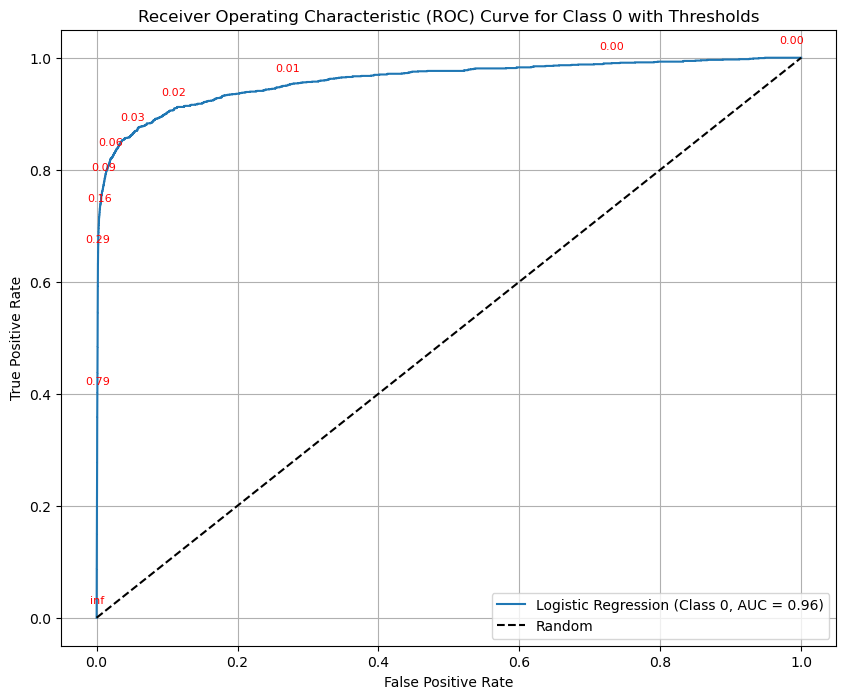

In [224]:
y_prob_negative = lr.predict_proba(x_test)[:, 0]  # Probability for the negative class (class 0)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for class 0
fpr, tpr, thresholds = roc_curve(y_test, y_prob_negative, pos_label=0)

# Compute AUC for class 0
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (Class 0, AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add threshold annotations for class 0
for i in range(0, len(thresholds), len(thresholds)//10):  # Annotate every 10% of thresholds
    plt.annotate(f'{thresholds[i]:.2f}', 
                 (fpr[i], tpr[i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', 
                 fontsize=8, 
                 color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0 with Thresholds')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [240]:
y_prob = lr.predict_proba(x_test)[:, 0]

custom_threshold = 0.2
y_pred = 1 -(y_prob >= custom_threshold).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1570
           1       0.99      1.00      1.00     82649

    accuracy                           0.99     84219
   macro avg       0.91      0.85      0.87     84219
weighted avg       0.99      0.99      0.99     84219



In [264]:
def convert_prob_to_score(probabilities, min_score=300, max_score=850):
    """
    Convert predicted probabilities to a score in the range [min_score, max_score].
    
    Parameters:
    - probabilities: array-like, predicted probabilities (values between 0 and 1)
    - min_score: int, minimum score in the desired range (default is 300)
    - max_score: int, maximum score in the desired range (default is 850)
    
    Returns:
    - scores: array-like, converted scores
    """
    # Ensure probabilities are within [0, 1]
    probabilities = np.clip(probabilities, 0, 1)
    
    # Linear transformation
    scores = min_score + (max_score - min_score) * probabilities
    #scores = max_score - (max_score - min_score) * probabilities
    
    return scores


In [266]:
y_prob = lr.predict_proba(x_test)
scores = convert_prob_to_score(y_prob[:, 1])
scores

array([846.35427024, 837.3975812 , 847.44014385, ..., 847.7126559 ,
       838.45789583, 847.72408914])

In [238]:
scores

array([303.64572976, 312.6024188 , 302.55985615, ..., 302.2873441 ,
       311.54210417, 302.27591086])

In [274]:
850 - (850-300 ) * 0.23

723.5

In [270]:
convert_prob_to_score(0.77)

723.5